https://seaborn.pydata.org/examples/index.html

In [1]:
import seaborn as sns

In [2]:
sns.set_style('darkgrid')
%matplotlib inline

In [7]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


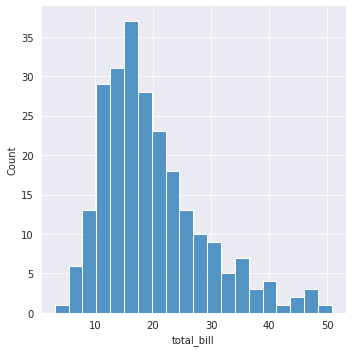

In [22]:
# For univariate
sns.displot(tips['total_bill'],kde=False,bins=20) # kde - kernel density estimation

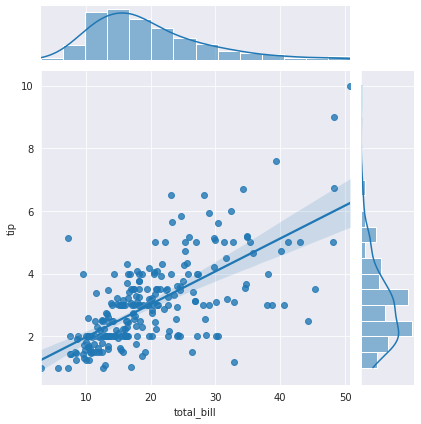

In [30]:
# bivariate
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg') # kind='kde'|'reg'|'hex'

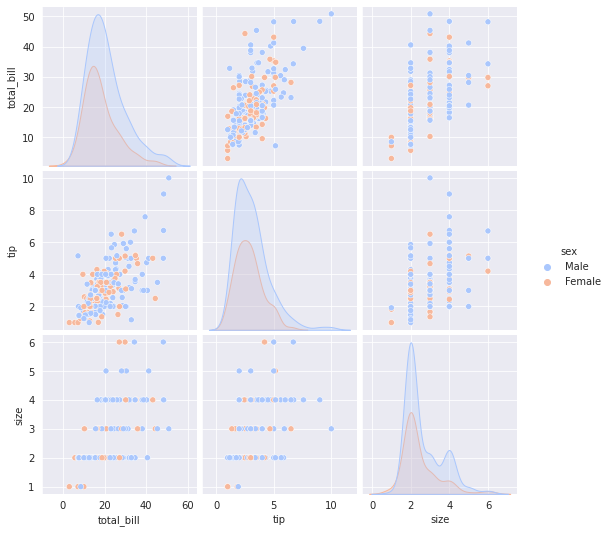

In [33]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

<AxesSubplot:xlabel='total_bill'>

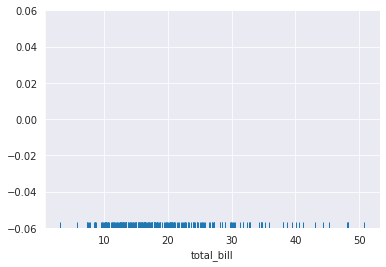

In [34]:
sns.rugplot(tips['total_bill'])

(0.0, 1.0)

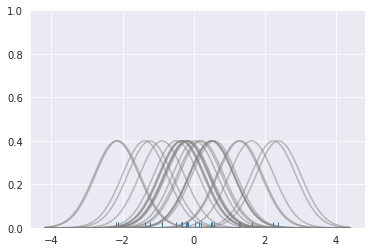

In [39]:
# KDE == kernel density estimation
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

dataset = np.random.randn(25)

sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4 * dataset.std() ** 5) / (3 * len(dataset))) ** .2

kernel_list = []

for data_point in dataset:
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

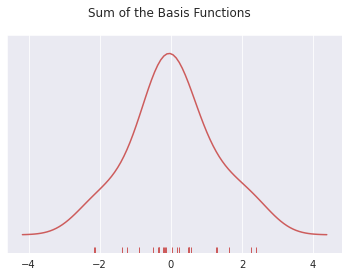

In [45]:
# To get the KDE plot, we can sum these basis functions

# PLot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset, c='indianred')

# Get rid of y-tick marks
plt.yticks([])

plt.suptitle('Sum of the Basis Functions')

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

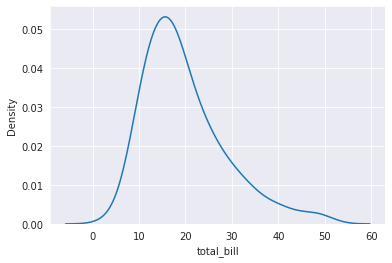

In [46]:
sns.kdeplot(tips['total_bill'])